In [23]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def load_results(parameter_name):
    filename = f"{parameter_name}_results.pkl"
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    print(f"Results for {parameter_name} loaded from {filename}")
    return results

In [25]:
def rolling_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

In [26]:
def plot_results(results, parameter_name, window_size=100):
    plt.figure(figsize=(12, 6))
    for value, path_lengths in results.items():
        if len(path_lengths) < window_size:
            print(f"Skipping {parameter_name}={value} due to insufficient data (length {len(path_lengths)})")
            continue
        rolling_avg = rolling_average(path_lengths, window_size=window_size)
        x_axis = np.arange(len(rolling_avg)) + window_size
        plt.plot(x_axis, rolling_avg, label=f'{parameter_name}={value}')
    plt.xlabel('Number of Paths Found')
    plt.ylabel('Rolling Average of Path Lengths')
    plt.xscale('log')
    plt.title(f'Influence of {parameter_name} on Convergence')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
loaded_alpha_results = load_results('alpha')
loaded_beta_results = load_results('beta')
loaded_pheromone_decay_results = load_results('pheromone_decay')
loaded_num_ants_results = load_results('num_ants')

Results for alpha loaded from alpha_results.pkl
Results for beta loaded from beta_results.pkl
Results for pheromone_decay loaded from pheromone_decay_results.pkl
Results for num_ants loaded from num_ants_results.pkl


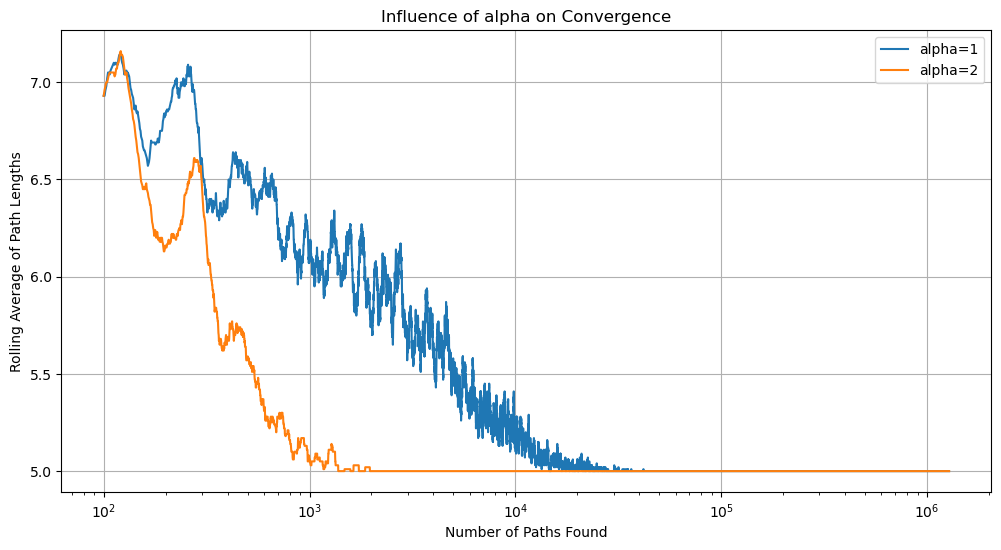

In [28]:
plot_results(loaded_alpha_results, 'alpha')

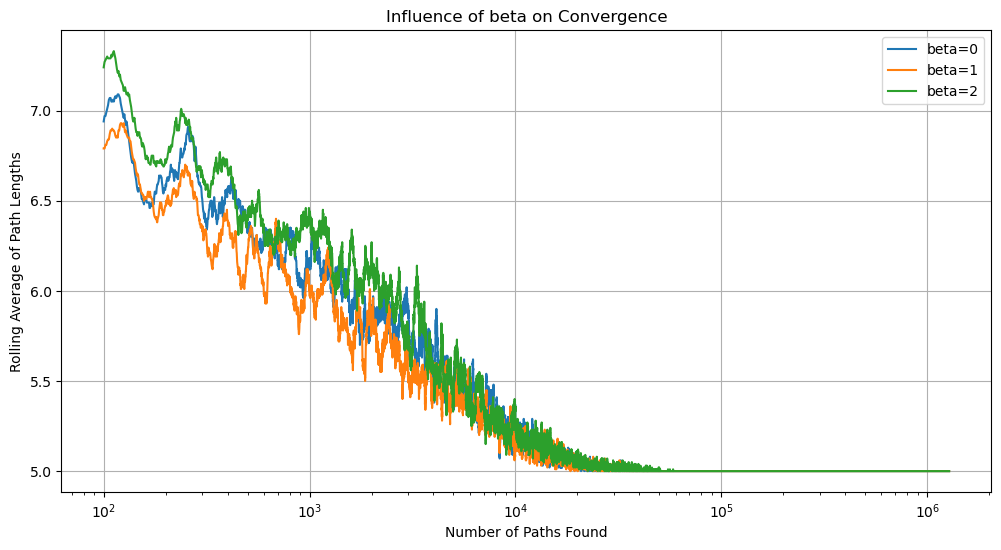

In [29]:
plot_results(loaded_beta_results, 'beta')

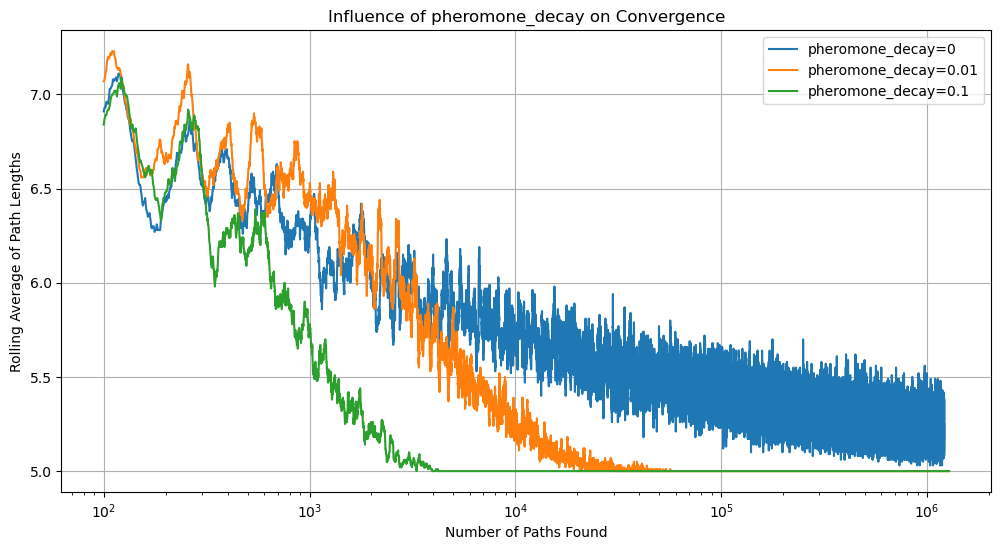

In [30]:
plot_results(loaded_pheromone_decay_results, 'pheromone_decay', window_size=100)

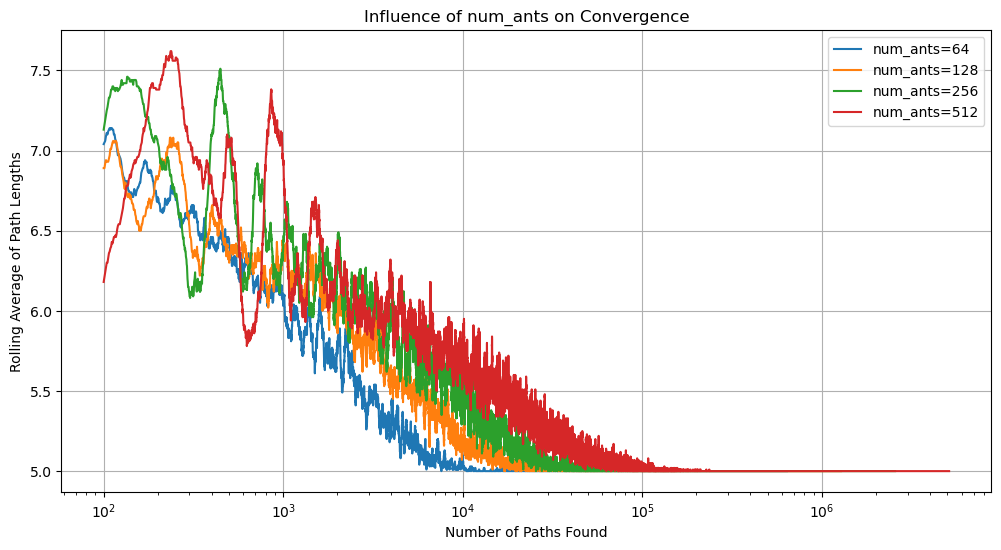

In [31]:
plot_results(loaded_num_ants_results, 'num_ants')